# LOAN PREDICTION: Decision Tree and Support Vector Machines

In [101]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn import tree  
from sklearn.tree import plot_tree  
from sklearn.metrics import accuracy_score 


## PART 1 - Data Handling

In [102]:
# Importing data with pandas
data = pd.read_csv("loan_dataset.csv")

In [103]:
# Showing an overview of our data
data 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [104]:
# The shape property returns a tuple representing the dimensionality of the DataFrame. 
# The format of shape is (rows, columns).
data.shape

(614, 13)

In [105]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. W
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [106]:
# Taking care of missing values
# Within pandas, a null value is considered missing and is denoted by NaN.
# First, I need to find out the number of missing values in each column.
# To see how many missing values exist in the collection I use .sum() chained on the function isnull(). 
data.isnull().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
# The dropna() function removes the empty fields from the data
data = data.dropna()  


In [108]:
# Checking whether any value is still missing
data.isnull().sum()  

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
# With the replace method all Y values will be replaced with boolean values
# With the implance method the table will be changed here
data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True) 

c:\users\alice\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [110]:
# Checking te table again
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [111]:
# Checking how many lines contains dependents  
data["Dependents"].value_counts()  

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [112]:
# We cannot have "+", so we fix this issue replacing "3+". I will call it " "4" 
data = data.replace(to_replace="3+",value=4)

In [113]:
# Now, I should count again
data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

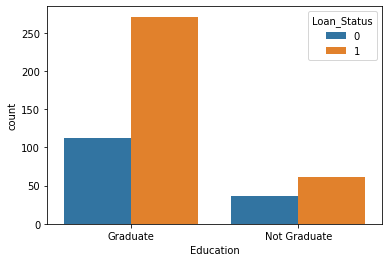

In [114]:
# Exploring Data through Visualizations with Seaborn
# Verifying if the Y is related to the level of education
sns.countplot(x="Education",hue="Loan_Status", data=data)  

<AxesSubplot:xlabel='Married', ylabel='count'>

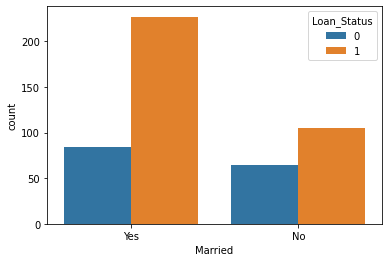

In [115]:
 # Checking if the y is related to marital status
sns.countplot(x="Married",hue="Loan_Status", data=data) 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

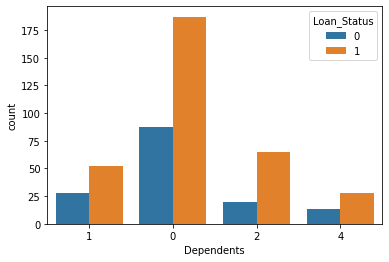

In [116]:
sns.countplot(x="Dependents",hue="Loan_Status",data=data)

In [117]:
data["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [118]:
data=data.replace({"Married":{"No":0,"Yes":1},
                  "Gender":{"Female":0,"Male":1},
                   "Self_Employed":{"No":0,"Yes":1},
                   "Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},
                   "Education":{"Not Graduate":0,"Graduate":1}
                  })

In [119]:
# Checking how it looks 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## PART 2 - Data Analysis

In [120]:
# Defining X by removing Loan_ID and Loan_Status (which is Y)
X  = data.drop(columns=["Loan_ID","Loan_Status"],axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [121]:
# Y will be defined as Loan_Status
Y = data["Loan_Status"]
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [122]:
 # Separating data into training and testing sets
train_test_split(X,Y,test_size=0.2) # wih the third parameter being the test_size, it automatically recognizes the training as 80%
 

[     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 12        1        1          2          1              0             3073   
 596       1        1          2          0              1             6383   
 71        1        1          2          0              1             1875   
 159       1        1          0          1              0             4583   
 402       1        0          0          1              0             2500   
 ..      ...      ...        ...        ...            ...              ...   
 216       1        1          0          1              0              150   
 67        1        1          1          1              0            10750   
 234       1        1          1          1              0             3155   
 269       0        0          1          1              0             2876   
 55        1        1          2          1              0             2708   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

In [123]:
# We have the data above in the following order: x training / x test / y training / y teste
# Now I store this in 4 variables:
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,test_size=0.2)

In [124]:
# Check the size of X training and x test
X_train.shape 

(384, 11)

In [125]:
X_test.shape 

(96, 11)

## Decision Tree Model 

In [126]:
# Creating the model  
model = tree.DecisionTreeClassifier(max_depth=3) 
model

DecisionTreeClassifier(max_depth=3)

In [127]:
# Passing our training set to the fit method 
# In fit we fit\train the weights using the training data. Note: Before you can make predictions, you must train a final model.
model.fit(X_train,Y_train) 

DecisionTreeClassifier(max_depth=3)

In [128]:
# Making a prediction to test the training 
model.predict(X_test) # It receives X as a parameter to predict Y  

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [129]:
# Storing the result in a variable 
Y_pred = model.predict(X_test)

In [130]:
# Checking model accuracy
accuracy_score(Y_pred,Y_real)
 

0.8541666666666666

In [131]:
# Getting the columns names
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

[Text(1860.0, 1902.6000000000001, 'Credit_History <= 0.5\ngini = 0.437\nsamples = 384\nvalue = [124, 260]\nclass = Accepted'),
 Text(1116.0, 1359.0, 'LoanAmount <= 547.5\ngini = 0.188\nsamples = 57\nvalue = [51, 6]\nclass = Denied'),
 Text(744.0, 815.4000000000001, 'LoanAmount <= 128.0\ngini = 0.163\nsamples = 56\nvalue = [51, 5]\nclass = Denied'),
 Text(372.0, 271.79999999999995, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = Denied'),
 Text(1116.0, 271.79999999999995, 'gini = 0.302\nsamples = 27\nvalue = [22, 5]\nclass = Denied'),
 Text(1488.0, 815.4000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Accepted'),
 Text(2604.0, 1359.0, 'CoapplicantIncome <= 9420.5\ngini = 0.347\nsamples = 327\nvalue = [73, 254]\nclass = Accepted'),
 Text(2232.0, 815.4000000000001, 'Married <= 0.5\ngini = 0.339\nsamples = 324\nvalue = [70, 254]\nclass = Accepted'),
 Text(1860.0, 271.79999999999995, 'gini = 0.438\nsamples = 105\nvalue = [34, 71]\nclass = Accepted'),
 Text(2604.0, 271.799

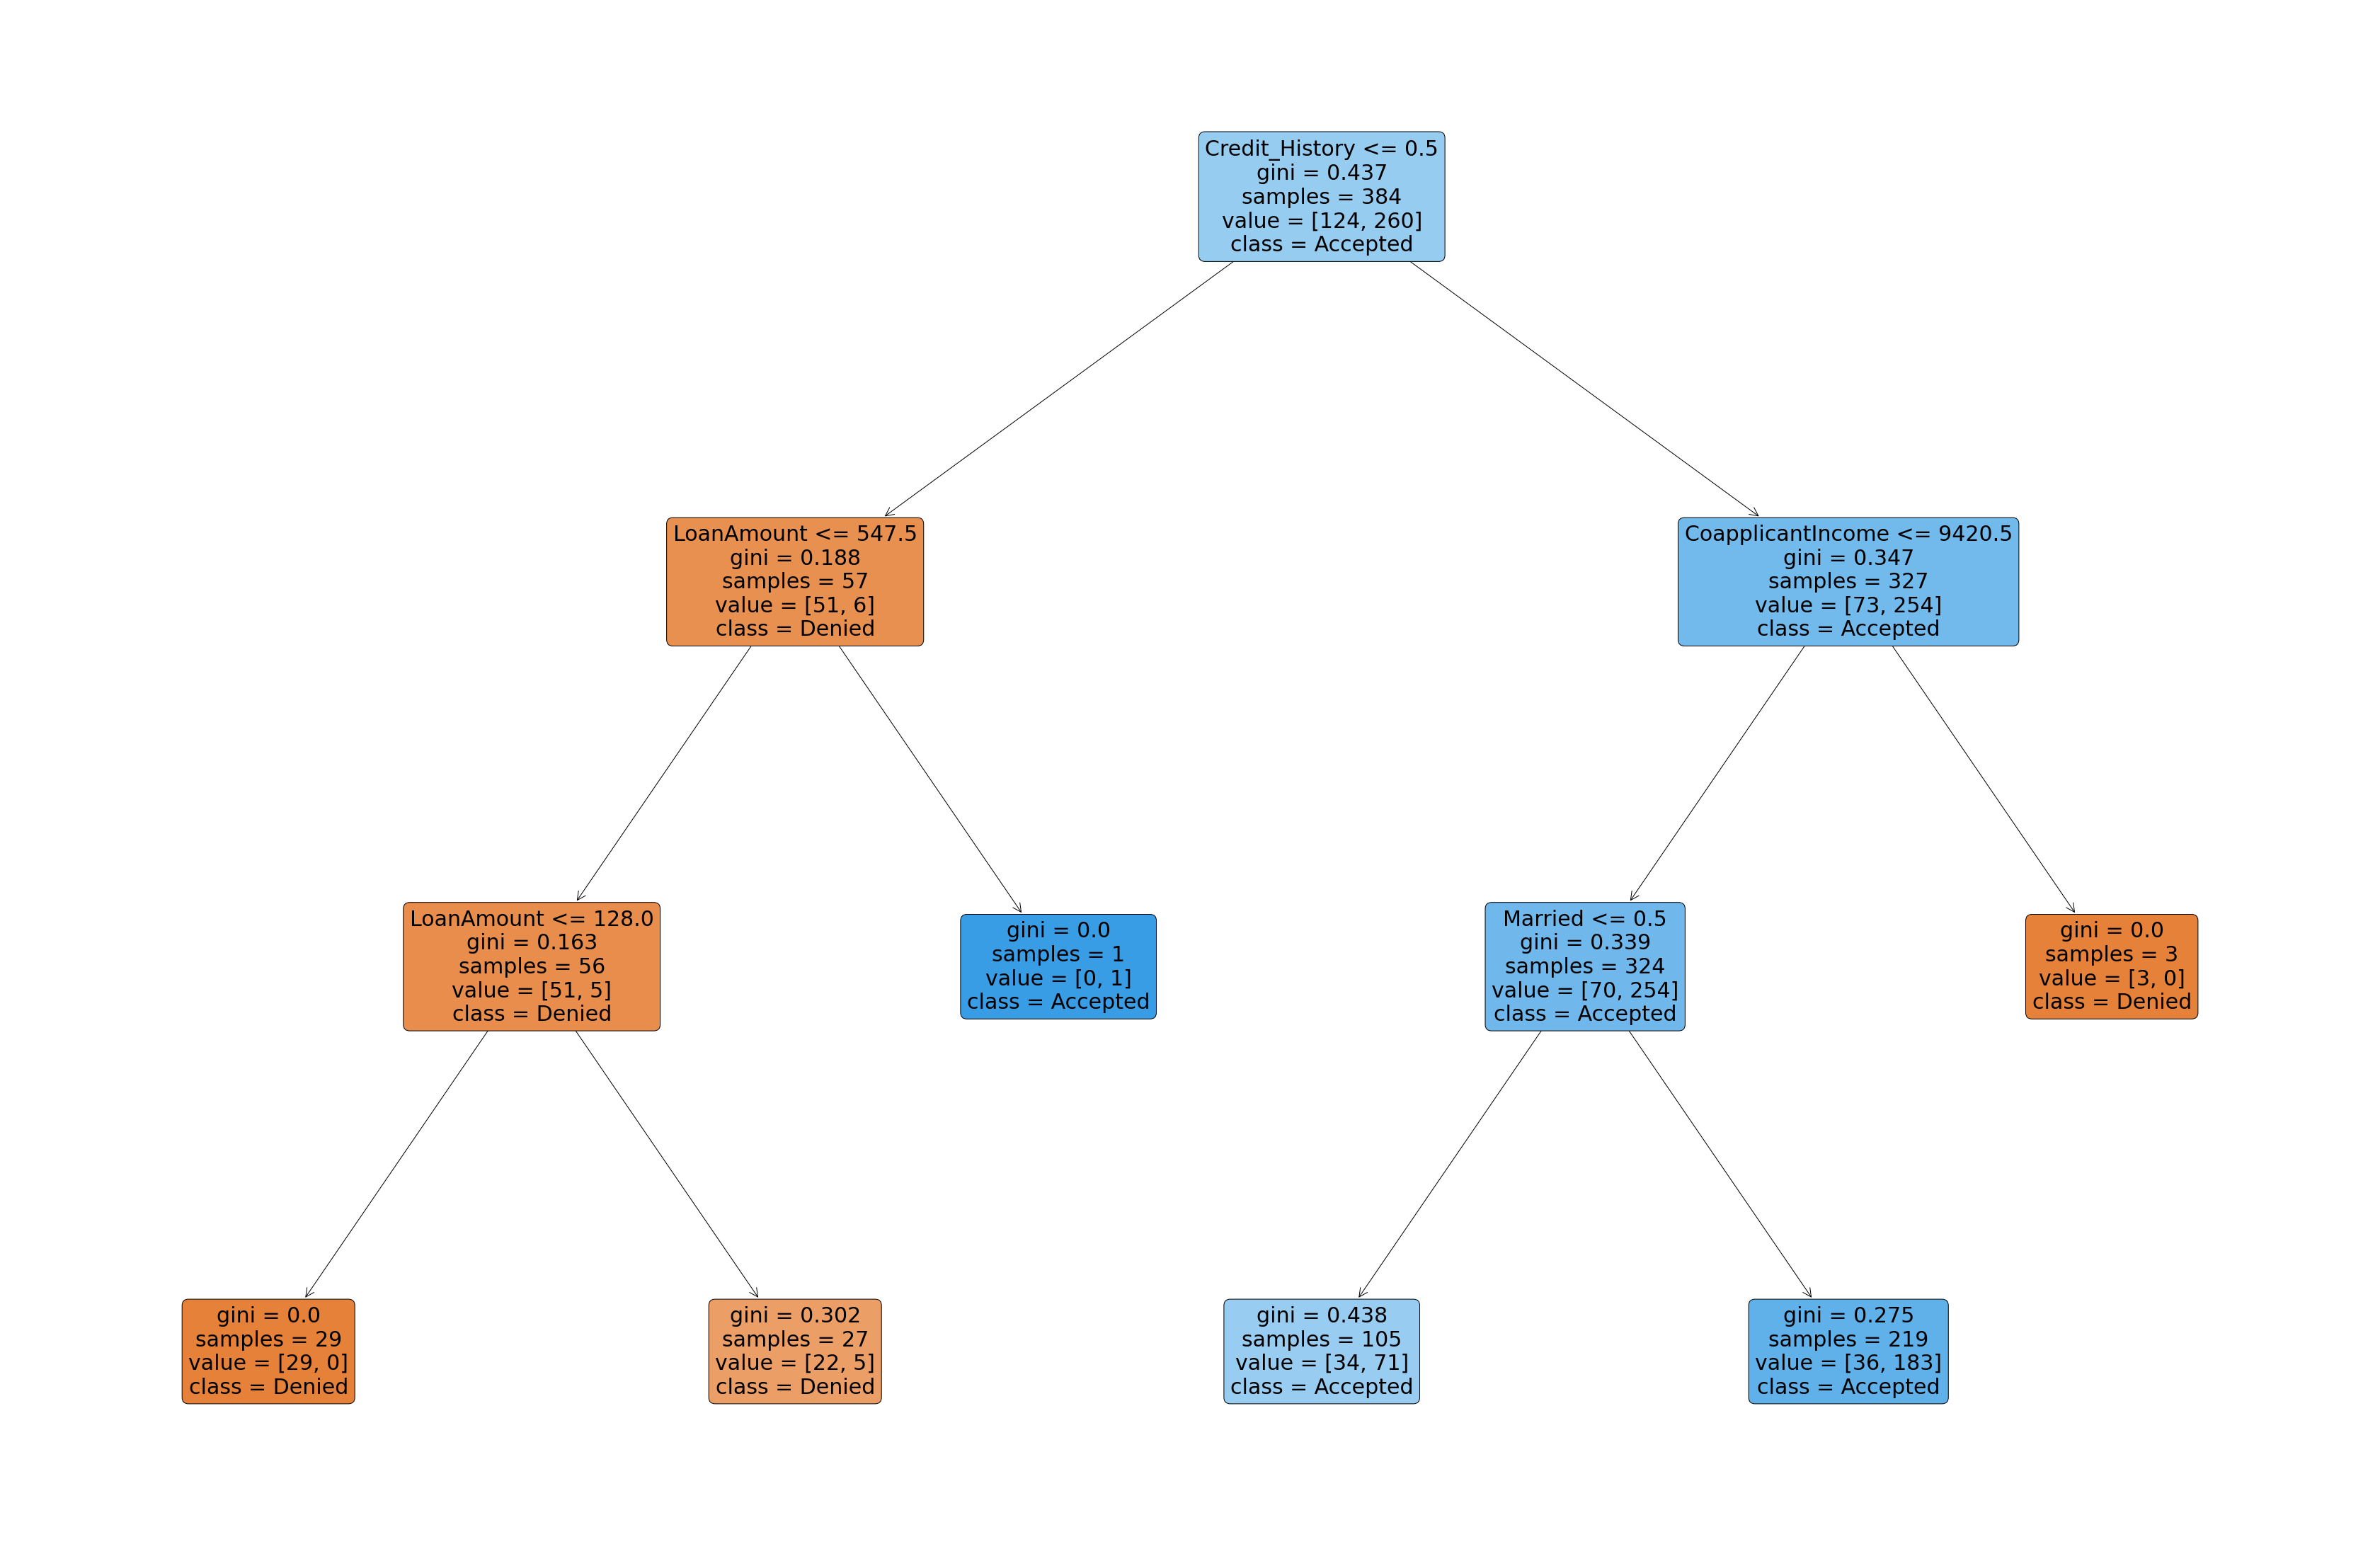

In [132]:
# Creating the tree with the plot tree function
# Use the figsize of plt.figure to control the size of the rendering 
plt.figure(figsize=(60,40))
plot_tree(model,
         feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
          class_names = ["Denied","Accepted"], filled=True, rounded=True, fontsize=30)

## Suport Vector Machine

In [133]:
from sklearn import svm 
model_SVC = svm.SVC(kernel="linear") # defining the method. I tested poli and rff but linear had the best accuracy (poli = 0,6875 /rff = 0,6875 )
model_SVC

SVC(kernel='linear')

In [134]:
model_SVC.fit(X_train,Y_train)

SVC(kernel='linear')

In [135]:
# Testing
Y_pred = model_SVC.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [136]:
# Comparing the predicted y with the real y find the accuracy
accuracy_score(Y_pred,Y_real)

0.8125

## PART 3 - Valuation Analysis: using kfold, a model validation technique

### Performance Masurement (accuracy score) 

In [ ]:
# I have found the accuracy score for the Decision Tree model (line 130) and SVM model (line 136). 
# Here are the results: 

# -> Decision Tree model  - accuracy score: 0.8541666666666666
# -> SVM model - accuracy score: 0.8125

### Kfold -> Decision Tree

In [137]:
# Now using kfold, a model validation technique where it's not using your pre-trained model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5,shuffle=True)  
cv_r = cross_val_score(model, X, Y, cv=kf)
np.mean(cv_r)

0.7770833333333333

### Kfold -> Support Vector Machine

In [138]:
from sklearn.model_selection import KFold
kf_svm = KFold(n_splits=5,shuffle=True)  
# first parameter = Number of folds. Must be at least 2.
# second parameter = Whether to shuffle the data before splitting into batches.

In [139]:
# Evaluating a score by cross-validation  
from sklearn.model_selection import cross_val_score
cv_svm = cross_val_score(model_SVC, X, Y, cv=kf_svm)  
# first parameter = The object to use to fit the data.
# second parameter = X
# second parameter = Y
# third parameter = cross validation
# NOTE: it took the empty model, trained it, tested it and compared the test result (predicted y) with the real y.
# after making this comparison it returns the accuracy of each fold (5)
cv_svm

array([0.72916667, 0.78125   , 0.73958333, 0.8125    , 0.84375   ])

In [140]:
# Mean accuracy 
np.mean(cv_svm)

0.78125